In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

In [6]:
data = pd.read_csv("C:/Users/kgrat/OneDrive/Documents/ALY 6020/week 4 - Nashville_housing_data.csv")

In [7]:
data.shape

(22651, 26)

In [8]:
data.head(10)

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
5,7,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,1/15/2013,20130115-0004888,No,No,...,68100,1216.00000,CRAWL,1932,FRAME,D,2.0,1.0,0.0,Under
6,8,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,1/25/2013,20130128-0008950,No,No,...,68100,1216.00000,CRAWL,1932,FRAME,D,2.0,1.0,0.0,Under
7,9,119 15 0 158.00,SINGLE FAMILY,113 NEESE DR,NaN,NASHVILLE,1/9/2013,20130111-0003850,No,No,...,57100,1152.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
8,10,133 07 0 195.00,SINGLE FAMILY,184 WHEELER AVE,NaN,NASHVILLE,1/18/2013,20130123-0007357,No,No,...,80100,1300.00000,CRAWL,1955,BRICK,C,2.0,1.0,0.0,Under
9,11,133 12 0 153.00,SINGLE FAMILY,238 ELYSIAN FIELDS RD,NaN,NASHVILLE,1/11/2013,20130115-0004796,No,No,...,87900,1175.00000,CRAWL,1968,BRICK,C,3.0,1.0,1.0,Under


In [9]:
data.columns = ['Unnamed: 0', 'Parcel_ID', 'Land_Use', 'Property_Address',
       'Suite/Condo', 'Property_City', 'Sale_Date', 'Legal_Reference',
       'Sold_As_Vacant', 'Multiple_Parcels_Involved_in_Sale', 'City', 'State',
       'Acreage', 'Tax_District', 'Neighborhood', 'Land_Value',
       'Building_Value', 'Finished_Area', 'Foundation_Type', 'Year_Built',
       'Exterior_Wall', 'Grade', 'Bedrooms', 'Full_Bath', 'Half_Bath',
       'Sale_Price_Compared_To_Value']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel_ID                          22651 non-null  object 
 2   Land_Use                           22651 non-null  object 
 3   Property_Address                   22649 non-null  object 
 4   Suite/Condo                        0 non-null      float64
 5   Property_City                      22649 non-null  object 
 6   Sale_Date                          22651 non-null  object 
 7   Legal_Reference                    22651 non-null  object 
 8   Sold_As_Vacant                     22651 non-null  object 
 9   Multiple_Parcels_Involved_in_Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [11]:
data.isna().sum()

Unnamed: 0                               0
Parcel_ID                                0
Land_Use                                 0
Property_Address                         2
Suite/Condo                          22651
Property_City                            2
Sale_Date                                0
Legal_Reference                          0
Sold_As_Vacant                           0
Multiple_Parcels_Involved_in_Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax_District                             0
Neighborhood                             0
Land_Value                               0
Building_Value                           0
Finished_Area                            1
Foundation_Type                          1
Year_Built                               0
Exterior_Wall                            0
Grade                                    0
Bedrooms                                 3
Full_Bath  

In [12]:
data.isnull().sum()

Unnamed: 0                               0
Parcel_ID                                0
Land_Use                                 0
Property_Address                         2
Suite/Condo                          22651
Property_City                            2
Sale_Date                                0
Legal_Reference                          0
Sold_As_Vacant                           0
Multiple_Parcels_Involved_in_Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax_District                             0
Neighborhood                             0
Land_Value                               0
Building_Value                           0
Finished_Area                            1
Foundation_Type                          1
Year_Built                               0
Exterior_Wall                            0
Grade                                    0
Bedrooms                                 3
Full_Bath  

In [13]:
data =data.drop('Suite/Condo',axis = 1)

In [14]:
df = pd.DataFrame(data)

In [15]:
df.isna().sum()

Unnamed: 0                             0
Parcel_ID                              0
Land_Use                               0
Property_Address                       2
Property_City                          2
Sale_Date                              0
Legal_Reference                        0
Sold_As_Vacant                         0
Multiple_Parcels_Involved_in_Sale      0
City                                   0
State                                  0
Acreage                                0
Tax_District                           0
Neighborhood                           0
Land_Value                             0
Building_Value                         0
Finished_Area                          1
Foundation_Type                        1
Year_Built                             0
Exterior_Wall                          0
Grade                                  0
Bedrooms                               3
Full_Bath                              1
Half_Bath                            108
Sale_Price_Compa

In [16]:
df['Full_Bath'].value_counts()

2.0     9263
1.0     8906
3.0     3137
4.0      921
5.0      304
6.0       80
7.0       15
0.0       11
8.0        6
10.0       4
9.0        3
Name: Full_Bath, dtype: int64

In [17]:
df['Sale_Price_Compared_To_Value'].value_counts()

Over     17047
Under     5604
Name: Sale_Price_Compared_To_Value, dtype: int64

In [18]:
df.isna().sum()

Unnamed: 0                             0
Parcel_ID                              0
Land_Use                               0
Property_Address                       2
Property_City                          2
Sale_Date                              0
Legal_Reference                        0
Sold_As_Vacant                         0
Multiple_Parcels_Involved_in_Sale      0
City                                   0
State                                  0
Acreage                                0
Tax_District                           0
Neighborhood                           0
Land_Value                             0
Building_Value                         0
Finished_Area                          1
Foundation_Type                        1
Year_Built                             0
Exterior_Wall                          0
Grade                                  0
Bedrooms                               3
Full_Bath                              1
Half_Bath                            108
Sale_Price_Compa

In [19]:
df = df.dropna(how = 'any')

In [20]:
df.isna().sum()

Unnamed: 0                           0
Parcel_ID                            0
Land_Use                             0
Property_Address                     0
Property_City                        0
Sale_Date                            0
Legal_Reference                      0
Sold_As_Vacant                       0
Multiple_Parcels_Involved_in_Sale    0
City                                 0
State                                0
Acreage                              0
Tax_District                         0
Neighborhood                         0
Land_Value                           0
Building_Value                       0
Finished_Area                        0
Foundation_Type                      0
Year_Built                           0
Exterior_Wall                        0
Grade                                0
Bedrooms                             0
Full_Bath                            0
Half_Bath                            0
Sale_Price_Compared_To_Value         0
dtype: int64

In [21]:
df['Sale_Price_Compared_To_Value']=df['Sale_Price_Compared_To_Value'].replace("Under",0).replace("Over",1) 

In [22]:
df = df.drop(columns=(['Unnamed: 0','Parcel_ID','Sale_Date','Property_Address']),axis =1)

In [25]:
c = df.corr()

In [26]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

<AxesSubplot:>

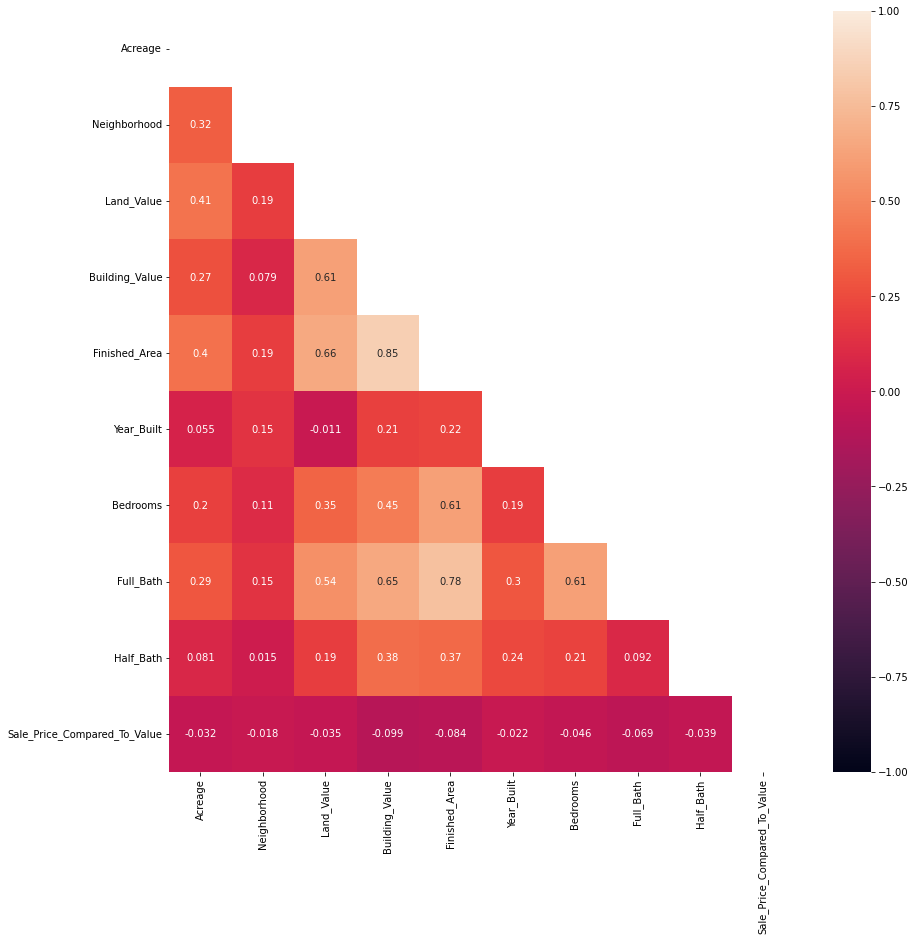

In [27]:
plt.figure(figsize=((14,14)))
sns.heatmap(c,annot=True, mask=mask, vmin=-1, vmax=1)

In [28]:
df['State'].value_counts()

TN    22536
Name: State, dtype: int64

In [29]:
df[df['Property_City'].str.match('NASHVILLE')]

,Land_Use,Property_City,Legal_Reference,Sold_As_Vacant,Multiple_Parcels_Involved_in_Sale,City,State,Acreage,Tax_District,Neighborhood,...,Building_Value,Finished_Area,Foundation_Type,Year_Built,Exterior_Wall,Grade,Bedrooms,Full_Bath,Half_Bath,Sale_Price_Compared_To_Value
0,SINGLE FAMILY,NASHVILLE,20130118-0006337,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,1
1,SINGLE FAMILY,NASHVILLE,20130124-0008033,No,No,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,1
2,SINGLE FAMILY,NASHVILLE,20130128-0008863,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,0
3,SINGLE FAMILY,NASHVILLE,20130131-0009929,No,No,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,0
4,SINGLE FAMILY,NASHVILLE,20130118-0006110,No,No,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22632,SINGLE FAMILY,NASHVILLE,20161031-0114632,No,No,NASHVILLE,TN,0.25,URBAN SERVICES DISTRICT,6028,...,104700,1911.00000,CRAWL,1972,BRICK,C,3.0,2.0,0.0,0
22634,SINGLE FAMILY,NASHVILLE,20161017-0109440,No,No,NASHVILLE,TN,0.25,URBAN SERVICES DISTRICT,4291,...,107300,1888.00000,CRAWL,1987,FRAME,C,3.0,3.0,0.0,1
22635,SINGLE FAMILY,NASHVILLE,20161006-0105547,No,No,NASHVILLE,TN,0.24,URBAN SERVICES DISTRICT,4291,...,97700,1912.00000,CRAWL,1989,FRAME,C,3.0,3.0,0.0,1
22649,SINGLE FAMILY,NASHVILLE,20161102-0115988,No,No,NASHVILLE,TN,0.15,URBAN SERVICES DISTRICT,126,...,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,1


In [30]:
df = df.drop(columns=['Property_City','City','Legal_Reference','State'], axis = 1)

In [31]:
df

,Land_Use,Sold_As_Vacant,Multiple_Parcels_Involved_in_Sale,Acreage,Tax_District,Neighborhood,Land_Value,Building_Value,Finished_Area,Foundation_Type,Year_Built,Exterior_Wall,Grade,Bedrooms,Full_Bath,Half_Bath,Sale_Price_Compared_To_Value
0,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3127,32000,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,1
1,SINGLE FAMILY,No,No,0.11,CITY OF BERRY HILL,9126,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,1
2,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3130,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,0
3,SINGLE FAMILY,No,No,0.34,URBAN SERVICES DISTRICT,3130,25000,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,0
4,SINGLE FAMILY,No,No,0.17,URBAN SERVICES DISTRICT,3130,25000,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,SINGLE FAMILY,No,No,0.38,URBAN SERVICES DISTRICT,6328,25000,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,1
22647,SINGLE FAMILY,No,No,0.27,URBAN SERVICES DISTRICT,6328,25000,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,1
22648,SINGLE FAMILY,No,No,0.23,URBAN SERVICES DISTRICT,6328,25000,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,1
22649,SINGLE FAMILY,No,No,0.15,URBAN SERVICES DISTRICT,126,40000,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,1


In [32]:
df['Sale_Price_Compared_To_Value']=df['Sale_Price_Compared_To_Value'].replace("Under",0).replace("Over",1) 

In [33]:
df['Sale_Price_Compared_To_Value'].value_counts()

1    16979
0     5557
Name: Sale_Price_Compared_To_Value, dtype: int64

In [34]:
new_df = pd.get_dummies(df,columns=['Land_Use','Sold_As_Vacant','Multiple_Parcels_Involved_in_Sale','Tax_District','Exterior_Wall','Grade','Foundation_Type'])

In [35]:
new_df

,Acreage,Neighborhood,Land_Value,Building_Value,Finished_Area,Year_Built,Bedrooms,Full_Bath,Half_Bath,Sale_Price_Compared_To_Value,...,Grade_E,Grade_OFB,Grade_SSC,Grade_X,Foundation_Type_CRAWL,Foundation_Type_FULL BSMT,Foundation_Type_PIERS,Foundation_Type_PT BSMT,Foundation_Type_SLAB,Foundation_Type_TYPICAL
0,0.17,3127,32000,134400,1149.00000,1941,2.0,1.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.11,9126,34000,157800,2090.82495,2000,3.0,2.0,1.0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.17,3130,25000,243700,2145.60001,1948,4.0,2.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.34,3130,25000,138100,1969.00000,1910,2.0,1.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.17,3130,25000,86100,1037.00000,1945,2.0,1.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,0.38,6328,25000,105000,1758.00000,1996,3.0,2.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
22647,0.27,6328,25000,142400,2421.00000,1996,3.0,3.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
22648,0.23,6328,25000,159300,3117.00000,1995,3.0,3.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
22649,0.15,126,40000,204100,1637.00000,2004,3.0,2.0,1.0,1,...,0,0,0,0,1,0,0,0,0,0


In [36]:
y=new_df['Sale_Price_Compared_To_Value']
x=new_df.drop('Sale_Price_Compared_To_Value',axis=1) 

In [37]:
y.shape

(22536,)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=123)

### Logistics Regression

In [39]:
logistic_reg = LogisticRegression()
model=logistic_reg.fit(x_train,y_train)

In [40]:
pred= model.predict(x_test)
print('Accuracy of the model is:{:.5f}'.format(model.score(x_test, y_test)))

Accuracy of the model is:0.75891


In [41]:
print("Precision:",metrics.precision_score(y_test,pred))
print("Recall:",metrics.recall_score(y_test,pred))

Precision: 0.7594353640416047
Recall: 0.9978524014057009


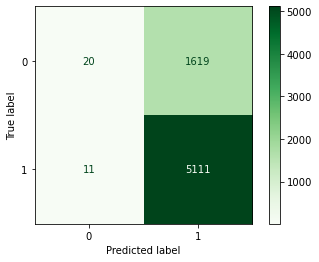

In [42]:
plot_confusion_matrix(logistic_reg,x_test, y_test,cmap='Greens')  
plt.show()

### Decison Tree

In [43]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=5)   
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [44]:
dt_pred = dt_model.predict(x_test)

In [45]:
acc_score = accuracy_score(y_test,dt_pred)

In [46]:
acc_score

0.7649755953261352

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

[[  73 1566]
 [  23 5099]]
              precision    recall  f1-score   support

           0       0.76      0.04      0.08      1639
           1       0.77      1.00      0.87      5122

    accuracy                           0.76      6761
   macro avg       0.76      0.52      0.47      6761
weighted avg       0.76      0.76      0.68      6761



[(0.0, 2.0), (30.0, 50.0)]

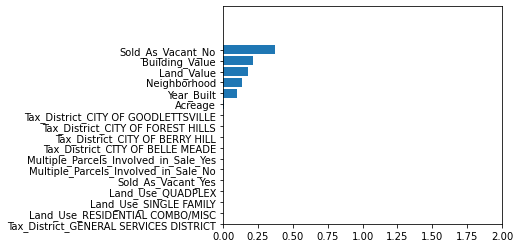

In [48]:
importances = dt_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=[5, 4])
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set(xlim=(0, 2),ylim=(30, 50))

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [50]:
rf_pred = rf_model.predict(x_test)

In [51]:
accuracy_score(y_test,rf_pred)

0.7615737316964946

In [52]:
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[  33 1606]
 [   6 5116]]
              precision    recall  f1-score   support

           0       0.85      0.02      0.04      1639
           1       0.76      1.00      0.86      5122

    accuracy                           0.76      6761
   macro avg       0.80      0.51      0.45      6761
weighted avg       0.78      0.76      0.66      6761



[(0.0, 2.0), (30.0, 50.0)]

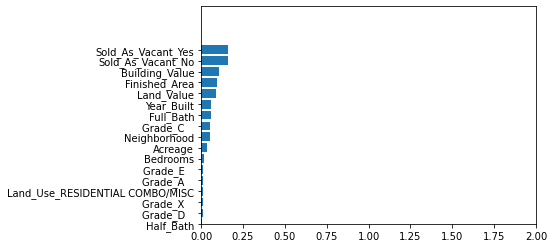

In [53]:
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set(xlim=(0, 2),ylim=(30, 50))

### Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [55]:
gb_pred = gb_model.predict(x_test)
accuracy_score(y_test,gb_pred)

0.76260908149682

In [56]:
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

[[ 111 1528]
 [  77 5045]]
              precision    recall  f1-score   support

           0       0.59      0.07      0.12      1639
           1       0.77      0.98      0.86      5122

    accuracy                           0.76      6761
   macro avg       0.68      0.53      0.49      6761
weighted avg       0.72      0.76      0.68      6761



[(0.0, 2.0), (30.0, 50.0)]

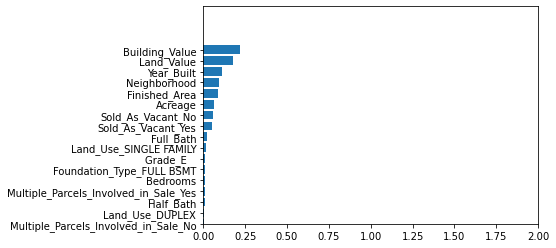

In [57]:
importances = gb_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set(xlim=(0, 2),ylim=(30, 50))